In [1]:
%matplotlib inline

import os
import inspect
import numpy as np
from scipy.stats import gamma
import matplotlib.pyplot as plt
os.chdir('../../util/')
from dbda2e_utilities import gamma_sh_ra_from_mean_sd, gamma_sh_ra_from_mode_sd
np.random.seed(2)
import jags_ydich_xnomssubj_mbinombetaomegakappa
import jags_ydich_xnomssubj_mbinombetaomegakappa_example

**Exercise 9.1. [Purpose: Try different priors on kappa to explore the role of kappa in shrinkage.]** Consider the analysis of the therapeutic touch data in Figure 9.10, p.243. The analysis used a generic gamma distributed prior on kappa that had a *mean* of 1.0 and a standard deviation of 10.0. We assumed that the prior had minimal influence on the results; here, we examine the robustness of the posterior when we change the prior to other reasonably vague and noncommittal distributions. In particular, we will examine a gamma distributed prior on kappa that had a *mode* of 1.0 and a standard deviation of 10.0.

**(A)** What are the shape and rate parameters for a gamma distribution that has mean of 1.0 and standard deviation of 10.0? What are the shape and rate parameters for a gamma distribution that has a mode of 1.0 and standard deviation of 10.0? *Hint:* use the utility functions `gammaShRaFromMeanSD` and `gammaShRaFromModeSD`.

In [2]:
# In this cell and the next one, the first returned value is the shape parameter and the second one is 
# the rate parameter
gamma_sh_ra_from_mean_sd(1, 10)

[0.01, 0.01]

In [3]:
gamma_sh_ra_from_mode_sd(1, 10)

[1.105124921972504, 0.10512492197250393]

**(B)** Plot the two gamma distributions, superimposed, to see which values of kappa they emphasise. 

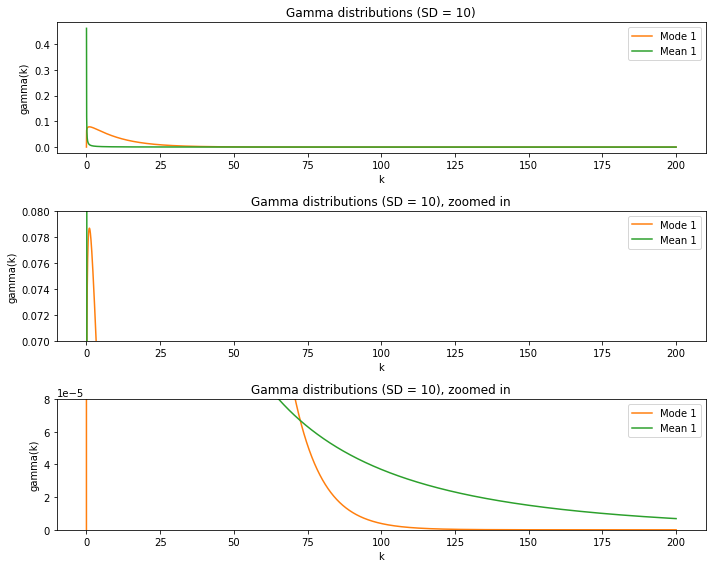

In [4]:
fig, ax = plt.subplots(3)
k = np.linspace(0, 200, 10001)
for i in range(3):
    ax[i].plot(k, gamma(1.1051249, scale = 1.0 / 0.1051249).pdf(k), color = 'C01') 
    ax[i].plot(k, gamma(0.01, scale = 1.0 / 0.01).pdf(k), color = 'C02') 
    ax[i].legend(['Mode 1', 'Mean 1'])
    ax[i].set_xlabel('k')
    ax[i].set_ylabel('gamma(k)')
ax[0].set_title('Gamma distributions (SD = 10)')
ax[1].set_ylim(0.07, 0.08)
ax[1].set_title('Gamma distributions (SD = 10), zoomed in')
ax[2].set_ylim(0, 8e-5)
ax[2].set_title('Gamma distributions (SD = 10), zoomed in')
fig.set_figwidth(10)
fig.set_figheight(8)
plt.tight_layout()

Relative to each other, which gamma distribution favours values of kappa between about 0.1 and 75? Which gamma distribution favours values of kappa that are tiny or greater than 75?

The distribution with mode = 1 favours values of kappa between 0.1 and 75.

The distribution with mean = 1 favours values of kappa that are tiny or greater than 75.

**(C)** In the program Jags-Ydich-XnomSsubj-MbinomBetaOmegaKappa.R, find the line in the model specification for the prior on `kappaMinusTwo`. Run the program once using a gamma with mean of 1.0, and run the program for a second time using a gamma with a mode of 1.0. Show the graphs of the posterior distribution. 

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [thetas, kappa_minus_two, omega]


Sampling 4 chains for 1_000 tune and 50_000 draw iterations (4_000 + 200_000 draws total) took 121 seconds.
The number of effective samples is smaller than 25% for some parameters.
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


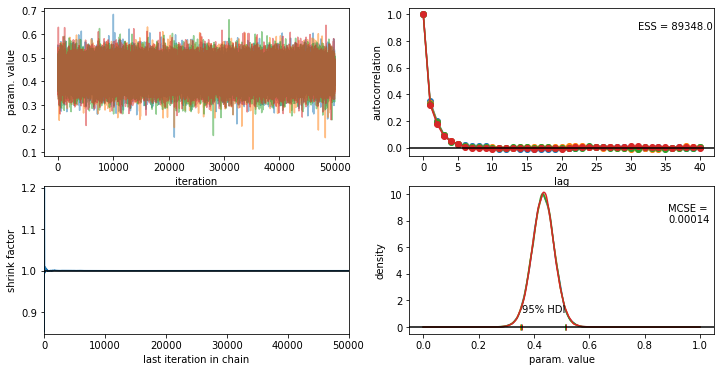

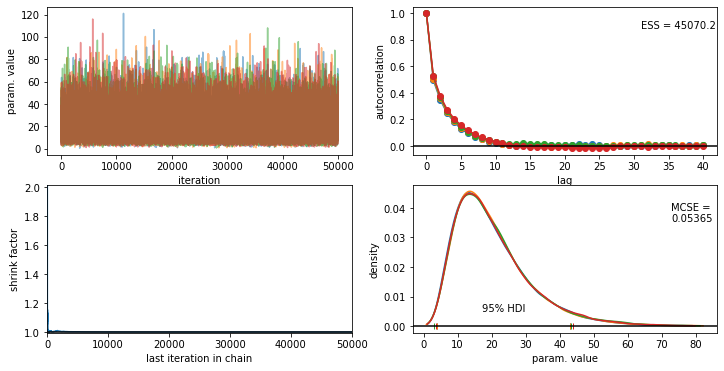

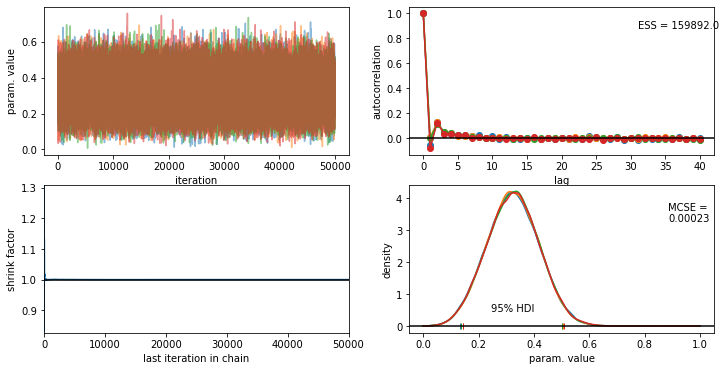

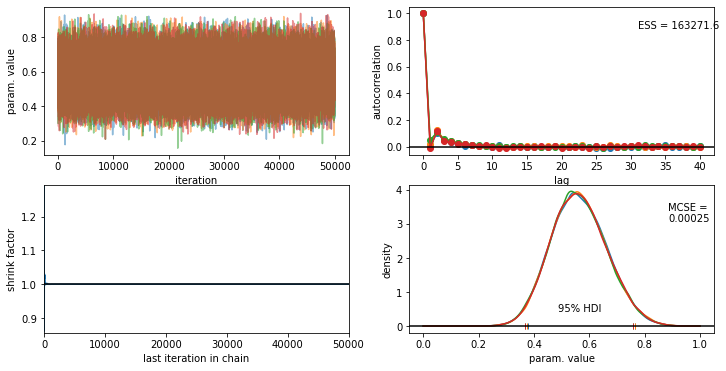

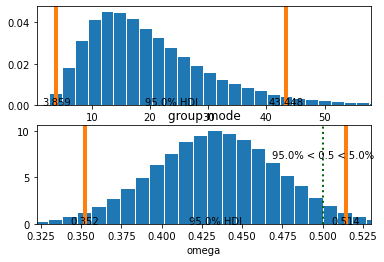

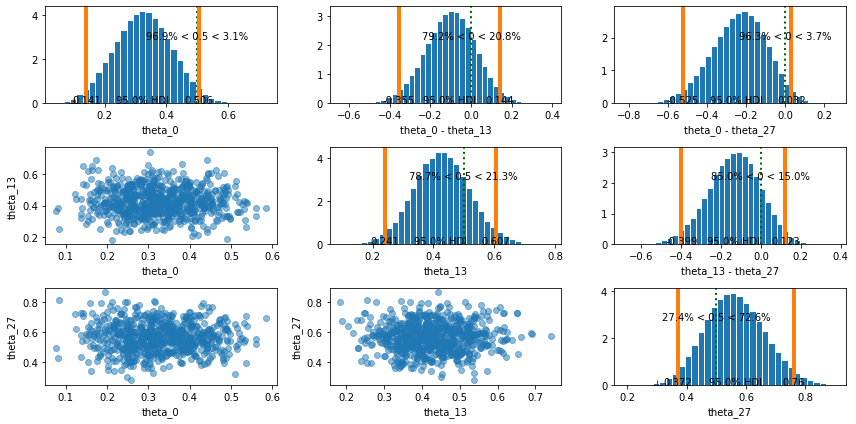

In [5]:
# Mode of 1
jags_ydich_xnomssubj_mbinombetaomegakappa_example.jags_ydich_xnomssubj_mbinombetaomegakappa_example()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [thetas, kappa_minus_two, omega]


Sampling 4 chains for 1_000 tune and 50_000 draw iterations (4_000 + 200_000 draws total) took 155 seconds.
There were 72 divergences after tuning. Increase `target_accept` or reparameterize.
There were 84 divergences after tuning. Increase `target_accept` or reparameterize.
There were 110 divergences after tuning. Increase `target_accept` or reparameterize.
There were 77 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 10% for some parameters.
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=

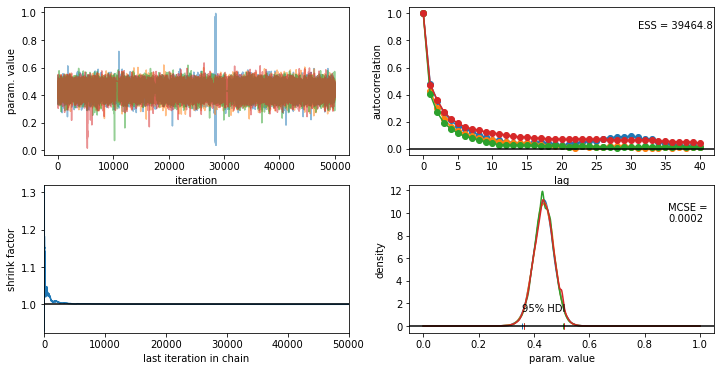

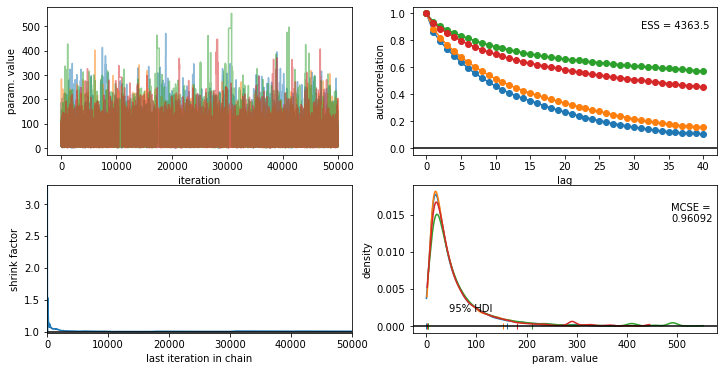

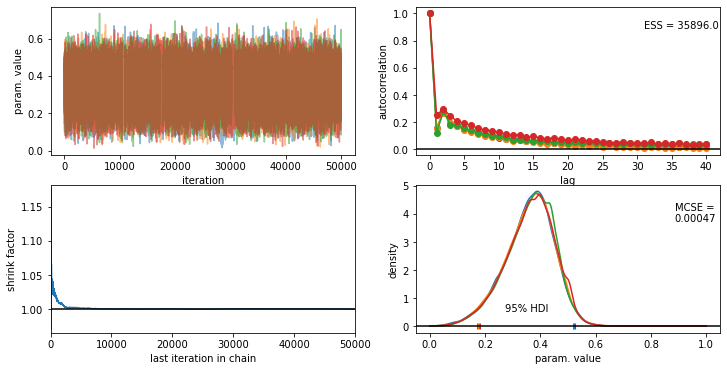

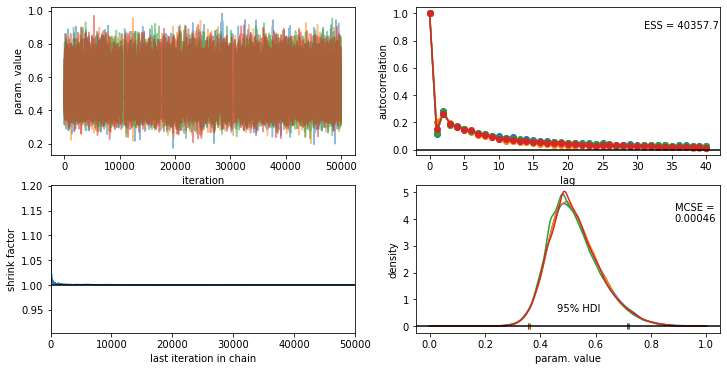

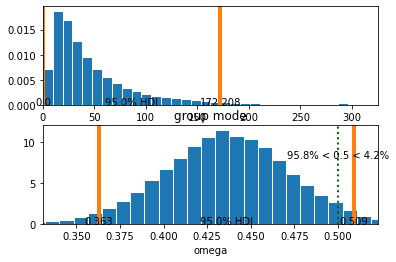

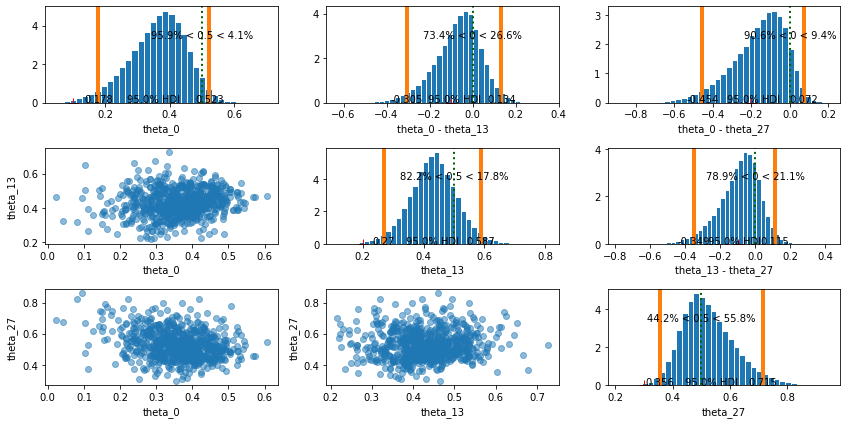

In [6]:
# Mean of 1
func = inspect.getsource(jags_ydich_xnomssubj_mbinombetaomegakappa.gen_mcmc)
func = func.replace('kappa_minus_two = pm.Gamma(\'kappa_minus_two\', 1.105125, 0.1051249) # mode = 1, sd = 10', 
                    'kappa_minus_two = pm.Gamma(\'kappa_minus_two\', 0.01, 0.01) # mean = 1, sd = 10')
exec(func, jags_ydich_xnomssubj_mbinombetaomegakappa.__dict__)
import imp
imp.reload(jags_ydich_xnomssubj_mbinombetaomegakappa_example)
jags_ydich_xnomssubj_mbinombetaomegakappa_example.jags_ydich_xnomssubj_mbinombetaomegakappa_example()

**(D)** Does the posterior distribution change much when the prior is changed? In particular, for which prior does the marginal posterior distribution on $\kappa$ have a bigger large-value tail? When $\kappa$ is larger, what effect does that have on shrinkage of the $\theta_s$ values?

The mean = 1 posterior distribution has a bigger large-value tail. That produces a visible shrinkage on the posterior of the $\theta$ parameters, whose modes are pushed towards the mode of the posterior distribution of $\omega$.

**(E)** Which prior do you think is more appropriate? To properly answer this question, you should do the next exercise!

The prior distribution with mode = 1 has a bigger impact on the implied prior of the $\theta$ distributions, as can be observed in the next exercise. Since we wanted a non-committal prior, using the mean = 1 prior seems more appropriate. 